In [43]:
import matplotlib.pyplot as plt
import PIL.Image

path_to_truth = "data/CenterLineImages_w/approaching (1)_w_centerline.png"
path_to_prediction = "data/predict_line/height_32/batch_56_channels/6400/train/approaching (1)_m.png"
#get image data, view image with PIL
truth = PIL.Image.open(path_to_truth)
pred = PIL.Image.open(path_to_prediction)

green_red=False


In [44]:
motion_classes = {
    (255, 140, 0):"next_into_driving_cut"
}

In [45]:
def resize_image(img1:PIL.Image, img2:PIL.Image):
    #get current w and h, desired w and h
    current = (img1.width, img1.height)
    desired = (img2.width, img2.height)
    assert current[0] != 0 and current[1] != 1
    return img1.resize(desired)


In [46]:
truth = resize_image(truth, pred)


In [47]:
# fill the image with the trajectory
pred_alpha = pred.copy()
pred_alpha.putalpha(50)
truth_alpha = truth.copy()
truth_alpha.putalpha(50)

map_img = truth.paste(pred_alpha, (0,0, pred.width, pred.height), pred_alpha)
map2 = pred.paste

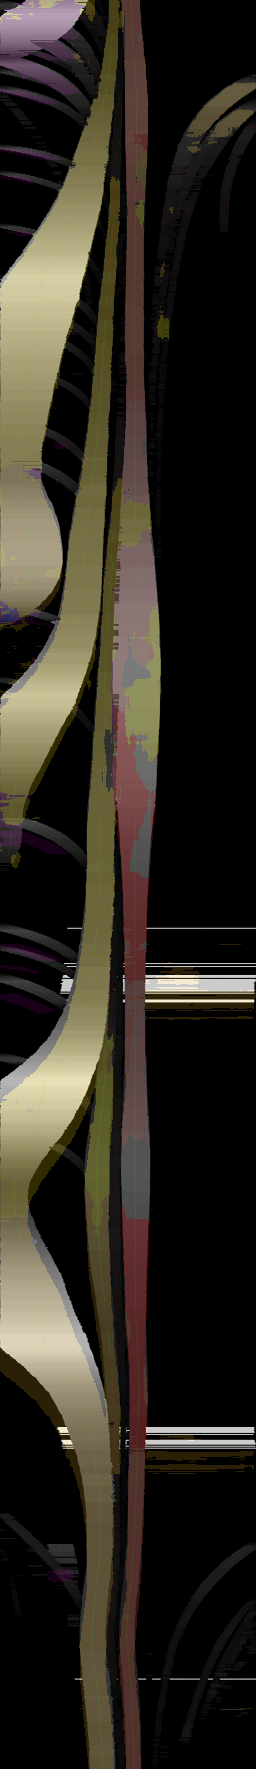

In [48]:
truth